<a href="https://colab.research.google.com/github/louispranata/UTS_ML2019_12741423/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2: Practical Machine Learning Project

31005 | 32513 Machine Learning Spring 2019

Louis Pranata 12741423

#Introduction

This report will be addressing a real-world problem and tries to solve it by producing analysis of its data and building data models. Based on the data, they will be tested accordingly and be compared with each other to provide concrete evidences of the solutions to the problems. For this report, it will be created by the cloud computing environment of Google Colab and using by the Python programming language.

The dataset that will be used to solve the problem is the heart.csv which contains data about patients who may have heart disease along with their statistics. Each rows contain some corresponding attributes such as age, sex, rest blood pressure and etc. This file will be used as one of the data inputs which will be used to help to solve the problem. The other input will be the hearttest.csv which will act as as the testing set that predicts the target column and compared to the training set to show the accuracy of the predictions. All the attributes in the dataset are listed below along with some definitons

Columns | Definitions  
---|---
Id|Identification Number
Age | Age in years
Sex| 1= Male, 0= Female
cp|chest pain type. Value 0: asymptomatic, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: typical angina
trestbps|resting blood pressure (in mm Hg on admission to the hospital)
chol|serum cholestoral in mg/dl
fbs|(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg|resting electrocardiographic results. Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria, Value 1: normal, Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
thalach|maximum heart rate achieved
exang|exercise induced angina (1 = yes; 0 = no)
oldpeak|ST depression induced by exercise relative to rest
slope|the slope of the peak exercise ST segment. 0: downsloping; 1: flat; 2: upsloping
ca|number of major vessels (0-3) colored by flourosopy
thal|3 = normal; 6 = fixed defect; 7 = reversable defect
target|0 = disease, 1 = no disease

The hearttest.csv dataset will be used to predict all the subjects if whether or not they have any heart diseases by calculating based on their other attributes. After they have been predicted, they will be compared with the train datasets to show the accuracy of the algorithm. The output of the assignment will be a CSV file containing the columns ID and Target where the target value are predicted by the chosen modules.

##Importing Libraries

This sections will import some libraries which can help to make coding easier such as linear algebra, read functions, graph plotting and statistics.

In [0]:
import numpy as np 
import pandas as pd
import xarray as xr  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats

##Load the Data

This section will load the csv datasets into the code so that we can use them to predict the accuracy of the algorithm. 

In [0]:
train = pd.read_csv('heart.csv')
test = pd.read_csv('hearttest.csv')


##Data Exploration

This sections will explore the data so that we have a better understanding of the corresponding dataset and look at their statistics. The 2 following codes, heads and tails, provides us a look of the dataset from the top and bottom 5 of the data. Then, we will use the len function to show the length of the training set.

In [0]:
train.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
train.tail()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,303,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [0]:
len(train)

303

The describe functions gives us statistics on all of the attributes from the train dataset so that we can know their means, standard deviation and interquartile ranges.

In [0]:
train.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,87.612784,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.500000,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,152.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,227.500000,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,303.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The below code will print us the size of both the train and test dataset.

In [0]:
print ("The train data has a size of {}" .format(train.shape))
print ("The test data has a size of {}" .format(test.shape))

The train data has a size of (303, 15)
The test data has a size of (302, 14)


##Data Processing

Firstly, we need to save the column ID so that we can compare the prediction values with the original one, then we need to drop the id column as it is not used during the process of prediction.



In [0]:
train_ID = train['id']
test_ID = test['id']
train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

Then, we need to get rid of some outliers which may affect the accuracy of the predictions. One way to do that is to completely remove the outliers from the dataset.

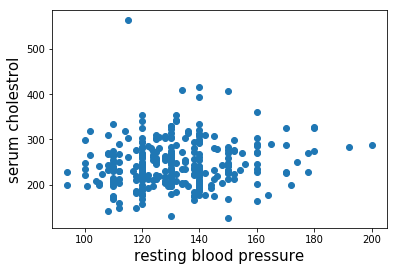

In [0]:
fig, ax = plt.subplots()
ax.scatter(x = train['trestbps'], y = train['chol'])
plt.xlabel('resting blood pressure', fontsize=15)
plt.ylabel('serum cholestrol', fontsize=15)
plt.show()

We use the drop function to not include the data based on the criteria inputed in the code.

In [0]:
train = train.drop(train[(train['trestbps']>160) 
                         & 
                         (train['chol']<380)].index)

Then, we make a correlation matrix to see all the colums of the dataset and search for any high correlation between any columns. Here we found out that:

- Slope and Oldpeak have a high negative correlation which makes sense as people with low oldpeak value will have a high slope value.
- cp and thalach has the highest positive correlation with target inside this dataset.

Below the correlation matrix, we use the lineplot and barplot function to give data visualtion of the highest and lowest correlation between columns in the dataset.

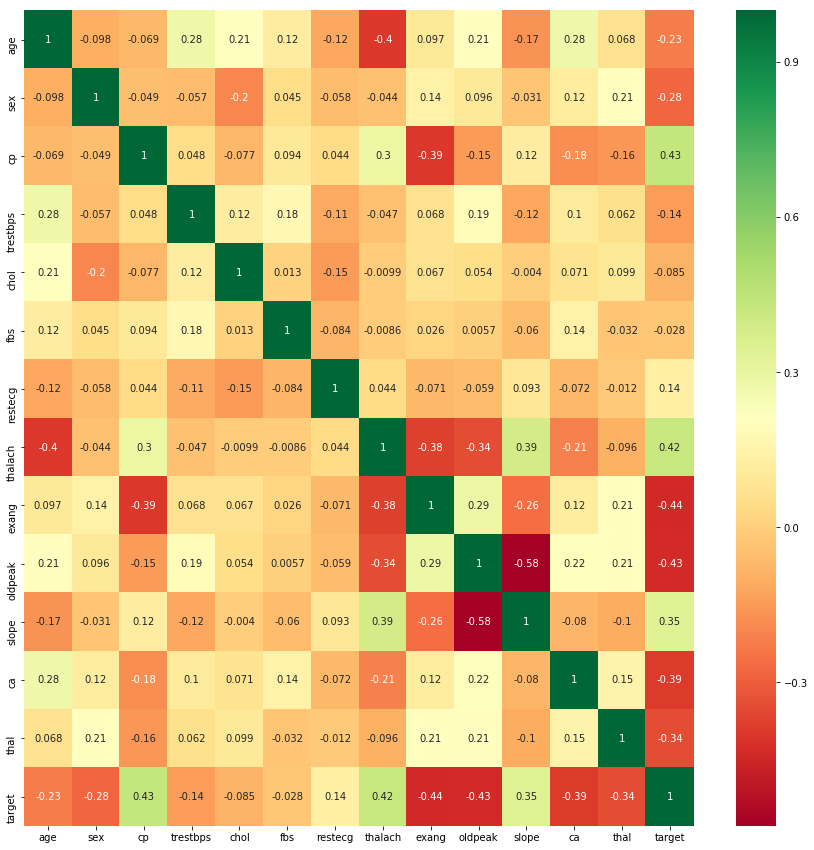

In [0]:
corrmat = train.corr()
top_corr_var = corrmat.index[abs(corrmat["chol"])>0]
plt.figure(figsize=(15,15))
ax = sns.heatmap(train[top_corr_var].corr(), annot=True, cmap="RdYlGn")

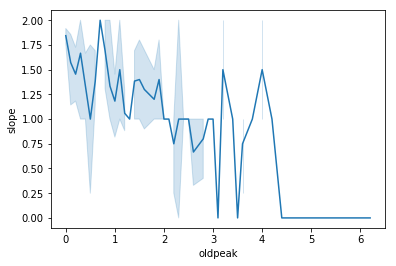

In [0]:
sns.lineplot(train.oldpeak,train.slope)

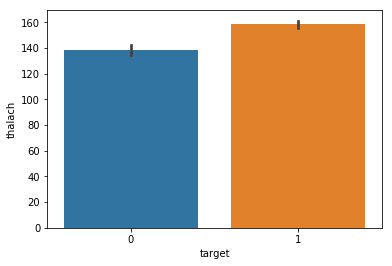

In [0]:
sns.barplot(train.target,train.thalach)

We make a scatterplot of some columns that we picked and think that will have produce any unique and interesting connect

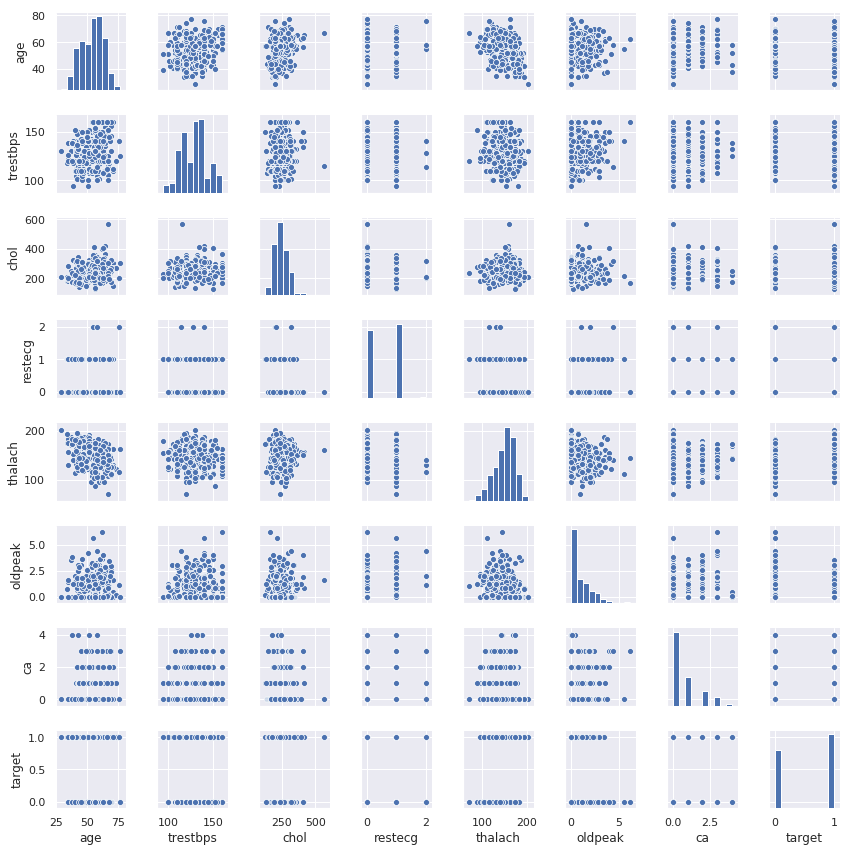

In [0]:
sns.set()
cols = ['age', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'ca','target']
sns.pairplot(train[cols], height = 1.5)
plt.show();

Looking at the scatter plot, we find some interesting findings and one of them is the connections between the columns age and thalach. Then, we make a plot where the regression line is being shown.

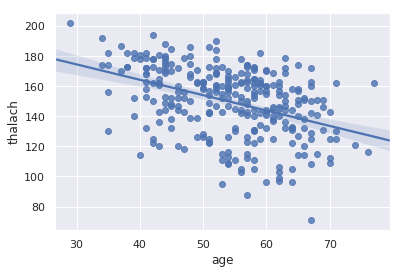

In [0]:
sns.regplot(train.age,train.thalach)

 Then we check the mean and sigma of their skewness of some attributes. For example, first we make the function check_skewness so that it will be easier to check each columns. In the diagrams below, we can see that it is not bell-shaped and the data dots do not follow the line.

In [0]:
def check_skewness(col):
    sns.distplot(train[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(train[col], plot=plt)
    (mu, sigma) = norm.fit(train[col])
    print( '\n The value of mu is {:.2f} and sigma is {:.2f}\n'.format(mu, sigma))


 The value of mu is 1.01 and sigma is 1.13



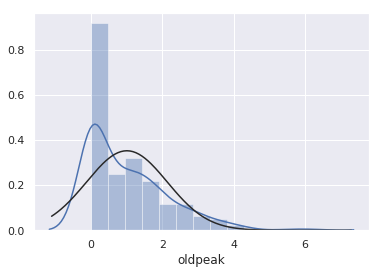

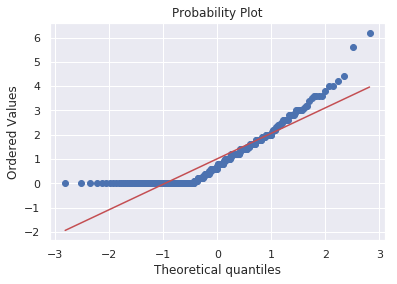

In [0]:
check_skewness('oldpeak')

To make the data better and more stable, we can use a log function so that the prediction value will be more accurate. After we use the log function, we can use the check skewness function again to check if the data has changed.


 The value of mu is 0.56 and sigma is 0.52



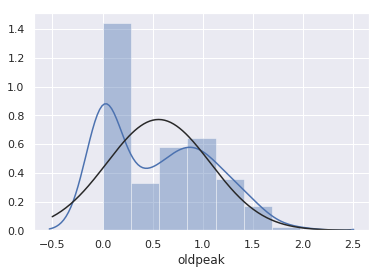

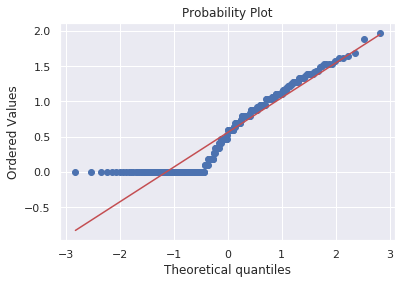

In [0]:
train["oldpeak"] = np.log1p(train["oldpeak"])

check_skewness('oldpeak')

#Data Engineering

Before we predict the target value, we need to make the training and testing set to be suitable for the prediction. Firstly, we will store all the data from the training and testing set.

In [0]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.target.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['target'], axis=1, inplace=True)
print("The size of all the data is : {}".format(all_data.shape))

The size of all the data is : (590, 13)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


Then, we will test if there is any null values in both the dataset. If there are any missing values, they will be stored in the missing_data and a message indicating that there are still missing values will be printed. Otherwise, 'No missing values' will be printed.

In [0]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
if missing_data.empty:
    print("No missing values!")
else:
    print("There are still missing value!")

No missing values!


After that, we must convert some of the column attributes in the dataset  so that they will not act as a datatype which they are not. For this dataset, most attributes are being recognised as a numerical value which are not correct for some columns. Some attributes contains number as their value but they are actually string value. The 6 attributes below need to have their data type changed into becoming a string.

In [0]:
all_data['sex'] = all_data['sex'].astype(str)
all_data['cp'] = all_data['cp'].astype(str)
all_data['fbs'] = all_data['fbs'].astype(str)
all_data['exang'] = all_data['exang'].astype(str)
all_data['ca'] = all_data['ca'].astype(str)
all_data['thal'] = all_data['thal'].astype(str)

Then, we will apply label encoder to all the categorical attributes so that they will be recognised not as a number value. For example, sex has only 2 value in the dataset which are 0 and 1. The number 0 and 1 are actually a replacement for the string Male and Female.

In [0]:
from sklearn.preprocessing import LabelEncoder
cols = ('sex','cp','fbs','exang','ca','thal')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
    
print("The size of all the data is : {}".format(all_data.shape))

The size of all the data is : (590, 13)


After that, we will check the skews of all the numberic attributes in the dataset so that we can transform them into becoming an attribute with a smoother variance.

In [0]:
number_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[number_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nThe Skew values for sll the numberic attributes in the dataset are: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
fbs,2.066916
oldpeak,1.730148
ca,1.319291
chol,1.170648
exang,0.761750
trestbps,0.529084
cp,0.469935
restecg,0.121250
age,-0.174801
thal,-0.460248


For all the numberic attributes in the dataset which has the skewness of more than 0.5, we will make them go through the for loop and make their skewness smoother.

In [0]:
skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p 
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

Lastly, we will make a dummy for all the data in the database so that it will be easier to prdict the target values. The size of both the training and testing datasets will also changed after the numerous data engineering that have been done before the prediction. Both the dataset have been pre-processed which will be suitable for the prediction.

In [0]:
all_data = pd.get_dummies(all_data)

In [0]:
print("The original size of the training set is ", train.shape)
print("The original size of the testing set is ", test.shape)
train = all_data[:ntrain]
test = all_data[ntrain:]
print("The current size of the training set is ", train.shape)
print("The current size of the testing set is ", test.shape)

The original size of the training set is  (288, 13)
The original size of the testing set is  (302, 13)
The current size of the training set is  (288, 13)
The current size of the testing set is  (302, 13)


#Modelling

In the modelling part, we will finally predict the target value which will indicate if each people will have heart disease or not. We will use many models which will help us to give the predictions on our dataset. Firsly, we will import all the necessary libraries for the modelling.

In [0]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from xgboost import XGBRegressor

Then, we will make a Validation function for all the models which will be used to evaluate and predict the models.

In [0]:
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#Models

Here, we will use the models with certain parameters which have been inserted and evaluate them using the score of its mean and standard deviation. If the mean and standard deviation score is not good, we can change their parameters to make them better.

##Lasso Regression

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.4208 (0.0495)



##XGB Regressor

In [0]:
xgb_model = XGBRegressor(n_estimators=3000, eta=0.04, 
                         max_depth=4, colsample_bytree=0.7,
                         min_samples_leaf=15, min_samples_split=10,
                         loss='huber', random_state =5)

score = rmsle_cv(xgb_model)
print("XGB score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[04:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB score: 0.4596 (0.0674)



##Elastic Net Regression

In [0]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.4208 (0.0495)



##Kernel Ridge Regression

In [0]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.4531 (0.0781)



##GBOOST Regressor

In [0]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.4609 (0.0679)



#Model Training

In this part, all the models with their parameters will be trained and fit with the training values. 

In [0]:
LassoMd = lasso.fit(train.values,y_train)
XGBoost = xgb_model.fit(train.values, y_train)
ENetMd = ENet.fit(train.values,y_train)
KRRMd = KRR.fit(train.values,y_train)
GBoostMd = GBoost.fit(train.values,y_train)

[04:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#Models Prediction

To predict the value of the target column, we will use the models which have been trained and calculate exp(x)-1 for all the attributes in the array. After that, the predicted value will be stored in seperated files. 

In [0]:
Lasso_pred = np.expm1(LassoMd.predict(test.values))
XGB_pred = np.expm1(XGBoost.predict(test.values))
ENet_pred = np.expm1(ENetMd.predict(test.values))
KRR_pred = np.expm1(KRRMd.predict(test.values))
GB_pred = np.expm1(GBoost.predict(test.values))

#Target Prediction

The last part is where all the predicted values will be put along with the id column so we can know and differentiate between each person. Then, each models with the id and predicted Target column will be made into a CSV file where we can compared to the original target and calculate the accuracy of each models.

In [0]:
#Lasso Regression
my_prediction=pd.DataFrame({'ID': test_ID, 'Target': Lasso_pred})
my_prediction.to_csv('Lasso_prediction.csv',index=False)

# Accuracy: 76.41196%

In [0]:
#XGB Regressor
my_prediction=pd.DataFrame({'ID': test_ID, 'Target': XGB_pred})
my_prediction.to_csv('XGB_prediction.csv',index=False)

# Accuracy: 91.0299%

In [0]:
#Elastic Net Regression
my_prediction=pd.DataFrame({'ID': test_ID, 'Target': ENet_pred})
my_prediction.to_csv('ENet_prediction.csv',index=False)

# Accuracy: 76.07973%

In [0]:
#Kernel Ridge Regression
my_prediction=pd.DataFrame({'ID': test_ID, 'Target': KRR_pred})
my_prediction.to_csv('KRR_prediction.csv',index=False)

# Accuracy: 77.40864%

In [0]:
#GBOOST regression
my_prediction=pd.DataFrame({'ID': test_ID, 'Target': GB_pred})
my_prediction.to_csv('GBOOST_prediction.csv',index=False)

# Accuracy: 92.02658%

#Conclusion

This dataset has been helped by using some models which are used to predict the target column by conducting experiments using the other attributes of the dataset. Some of the models shows some high accuracy of more than 90% while the others only achieved around 70% recognition rate. While this does not produce much problems, there are many possible ways to improve the accuracy of the models. Because this is my first-time using python added with time restriction, it is hard to explore all the attributes in the dataset and find all the interesting and unique information found in the dataset. The data engineering and modelling in this assignment may also be not enough to achieve the best pre-processed state that is used during the predictions. As I gain experience of using python from this assignment, I can do better with future assignments or works which requires the skills of writing codes and exploring datasets.


#Ethical Discussion

Algorithm has been used silently to structure all the things in our life such as job offers, loans and advertisements. People will always want algorithm to act as a neutral in every aspects of human’s life but if people who have the right and responsibility to make the algorithm write the coding based on their judgement, then the algorithm will not act as a neutral anymore in any decision making (Martin, 2018). A human will always decide based on their judgement and this will create biases for algorithm if the human implements it. While this bias may be proven harmless in some decision making, the others may prove fatal for some individuals. 

For example, an algorithm predicts people who may commit violent crimes in the future but only 20% of them went to commit them (Martin, 2018). Moreover, the prediction also causes significant racial differences as the algorithm label white defendants as a low risk while labelling black defendants to potentially commit crimes at twice the rate. Algorithm must make decisions based on the facts, law and the defendants’ circumstances, not based on factors which is uncontrollable and possibilities that can happen. Algorithm which is filled with preferences of certain outcomes by someone cannot act as a neutral and should not be used for any decision making as it can create bias towards any side of the problem (Martin, 2018).


##Reference List 

Martin, K. 2018, Ethical Implications and Accountability of Algorithms, Journal of Business Ethics,.

##*Links* of sources =

Github: https://github.com/louispranata/UTS_ML2019_12741423/blob/master/Assignment_2.ipynb

Youtube Video: 